<a href="https://colab.research.google.com/github/thevedantt/LangDetect/blob/main/LangDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv")
print(data.head())

                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [ ]:
data.isnull().sum()

,0
Text,0
language,0


In [ ]:
data["language"].value_counts()

,count
language,
Estonian,1000
Swedish,1000
Thai,1000
Tamil,1000
Dutch,1000
Japanese,1000
Turkish,1000
Latin,1000
Urdu,1000


In [ ]:
x = np.array(data["Text"])
y = np.array(data["language"])
cv = CountVectorizer()

X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.953168044077135

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: how are you
['English']


In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: ऋतुजा तुला वाढदिवसाच्या हार्दिक शुभेच्छा
['Hindi']


Sample Data:
                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch

Missing Values:
Text        0
language    0
dtype: int64

Language Distribution:
language
Estonian      1000
Swedish       1000
Thai          1000
Tamil         1000
Dutch         1000
Japanese      1000
Turkish       1000
Latin         1000
Urdu          1000
Indonesian    1000
Portugese     1000
French        1000
Chinese       1000
Korean        1000
Hindi         1000
Spanish       1000
Pushto        1000
Persian       1000
Romanian      1000
Russian       1000
English       1000
Arabic        1000
Name: count, dtype: int64

Model Accuracy: 0.953168044077135

Classification Report:
               

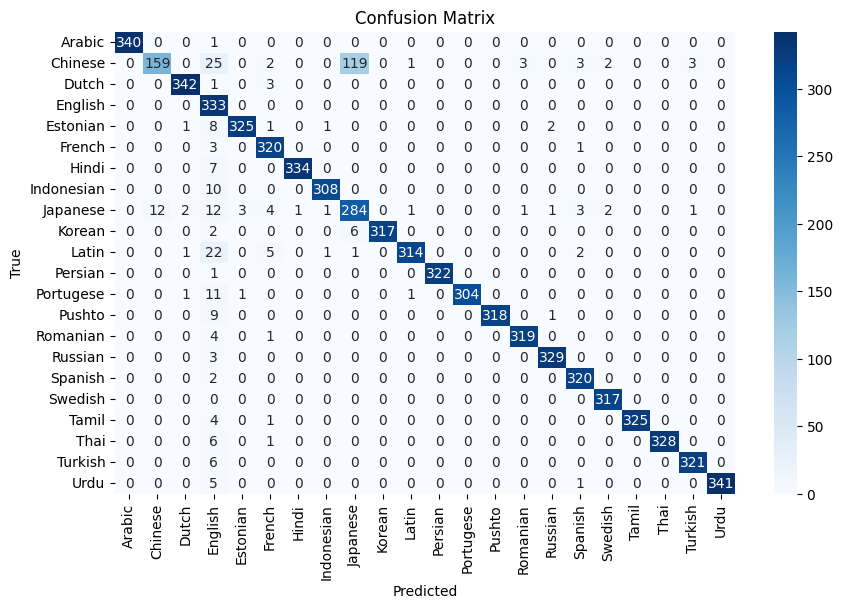

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from an online source
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv")

# Display first few rows of the dataset
print("Sample Data:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check distribution of classes (languages)
print("\nLanguage Distribution:")
print(data["language"].value_counts())

# Feature (X): Text data; Label (y): Language
x = np.array(data["Text"])
y = np.array(data["language"])

# Convert text into numeric feature vectors (Bag-of-Words)
cv = CountVectorizer()
X = cv.fit_transform(x)  # Learn vocabulary and transform text into vectors

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y), cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Accept input text from user
user_input = input("\nEnter a Text to Detect Language: ")
input_vector = cv.transform([user_input]).toarray()  # Transform input text using the same vectorizer

# Predict the language of user input
output = model.predict(input_vector)
print("Predicted Language:", output[0])
